# **Visualization of the 3X+1 Conjecture**

## **Content**
1. Overview
2. Historic Results
3. Experiements
4. Summary

Reference:
http://www.ericr.nl/wondrous/



## **Overview**
As one of the most famous unsolved mathematical problems, it has troubled mathematicians more than 80 years. In this notebook, we will present some of the bizzare behaviours of the $3X+1$ problem and explain why such conjecture can be so difficult. However, the purpose of this note is to demonstrate the visualization part of the conjecture, rather than work through rigorous proofs or strict mathematical definitions.

The Collatz function can be defined as:

\begin{equation}
    T(n)=\begin{cases}
      \frac{n}{2} \;\; \text{if} \;\; n \equiv 0 \pmod{2}\\
      3n+1 \;\; \text{if} \;\; n\equiv 1 \pmod{2}
    \end{cases}
\end{equation}

The $k$-th iteration of the Collatz function is often denoted as $T^{(k)}(n)$, then the Collatz sequence or 'trajectory' is $C(n)=\lbrace n, T^{(1)}(n), T^{(2)}(n), T^{(3)}(n), ... , T^{(k)}(n) \rbrace$. The length of trajectory, or 'stopping time', is defined as $S(n)=|C(n)|-1$, for example, $C(3)=\lbrace 3, 10, 5, 16, 8, 4, 2, 1 \rbrace$, and $S(3)=|C(3)|-1=7$.

The Collatz conjecture asserts that $S(n)$ is finite for all $n\geq{2}$.

## **Historic Results**

We see that the trajectory consists of some ascending and descending part, and the iteration itself maps one sequence into another, i.e., $T^{(1)}(3) \rightarrow T(10), $ and therefore $S(10)=S(3)-1$. Now we are going to examine the bigger picture and why they those trajectories are so difficult to analyze.

We begin by showing three similar Collatz trajectories of integer $27$, $31$ and $41$.

In [94]:
import numpy as np
import math
from matplotlib.pyplot import step, show
import matplotlib.pyplot as plt
from math import log

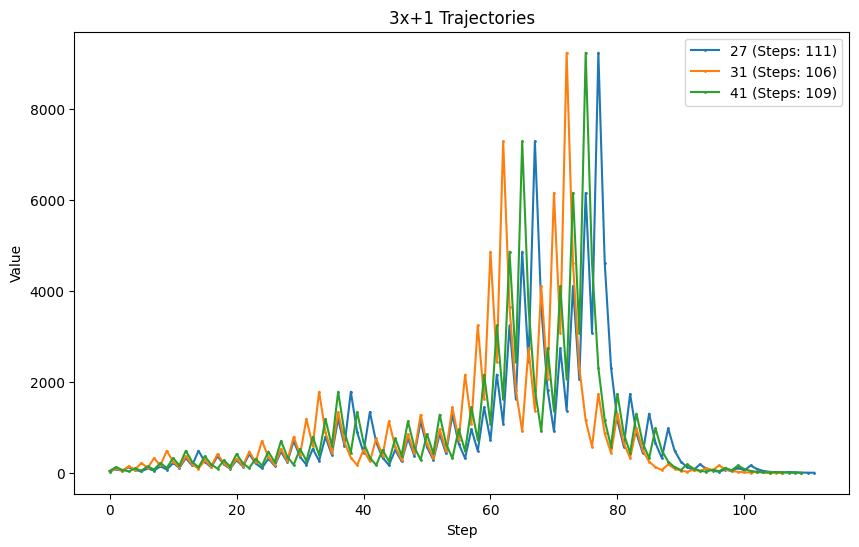

Sequence for 27 (Steps: 111): [27, 82, 41, 124, 62, 31, 94, 47, 142, 71, 214, 107, 322, 161, 484, 242, 121, 364, 182, 91, 274, 137, 412, 206, 103, 310, 155, 466, 233, 700, 350, 175, 526, 263, 790, 395, 1186, 593, 1780, 890, 445, 1336, 668, 334, 167, 502, 251, 754, 377, 1132, 566, 283, 850, 425, 1276, 638, 319, 958, 479, 1438, 719, 2158, 1079, 3238, 1619, 4858, 2429, 7288, 3644, 1822, 911, 2734, 1367, 4102, 2051, 6154, 3077, 9232, 4616, 2308, 1154, 577, 1732, 866, 433, 1300, 650, 325, 976, 488, 244, 122, 61, 184, 92, 46, 23, 70, 35, 106, 53, 160, 80, 40, 20, 10, 5, 16, 8, 4, 2, 1]
Sequence for 31 (Steps: 106): [31, 94, 47, 142, 71, 214, 107, 322, 161, 484, 242, 121, 364, 182, 91, 274, 137, 412, 206, 103, 310, 155, 466, 233, 700, 350, 175, 526, 263, 790, 395, 1186, 593, 1780, 890, 445, 1336, 668, 334, 167, 502, 251, 754, 377, 1132, 566, 283, 850, 425, 1276, 638, 319, 958, 479, 1438, 719, 2158, 1079, 3238, 1619, 4858, 2429, 7288, 3644, 1822, 911, 2734, 1367, 4102, 2051, 6154, 3077, 9232, 

In [98]:
def collatz_trajectory(n):
    trajectory = [n]
    steps = 0
    while n != 1:
        if n % 2 == 0:
            n = n // 2
        else:
            n = 3 * n + 1
        trajectory.append(n)
        steps += 1
    return trajectory, steps
trajectories = {}
for n in [27, 31, 41]:
    trajectory, steps = collatz_trajectory(n)
    trajectories[n] = (trajectory, steps)
plt.figure(figsize=(10, 6))
for n, (trajectory, steps) in trajectories.items():
    plt.plot(trajectory, marker='o', markersize=1, label=f'{n} (Steps: {steps})')
plt.xlabel('Step')
plt.ylabel('Value')
plt.title('3x+1 Trajectories')
plt.legend()
plt.show()
for n, (trajectory, steps) in trajectories.items():
    print(f"Sequence for {n} (Steps: {steps}): {trajectory}")

Then we take a look at more trajectories and their respected stopping time.

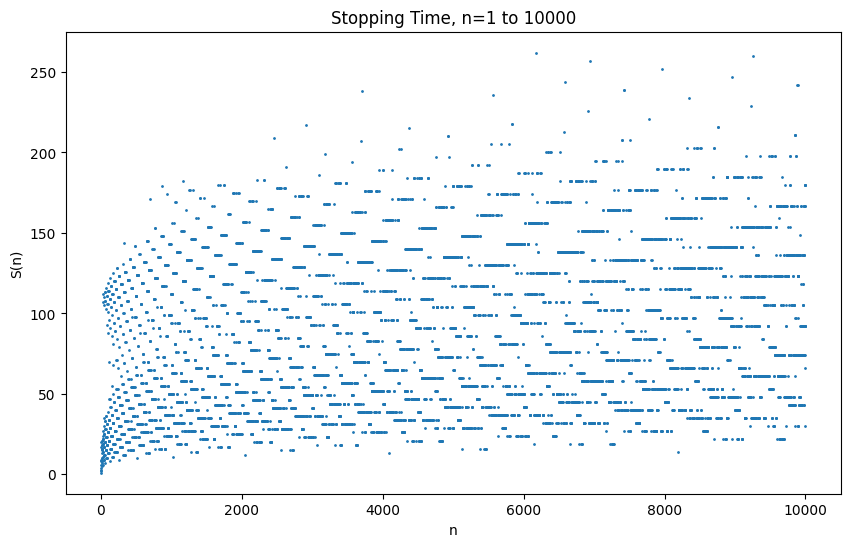

In [97]:
def collatz_trajectory_length(n):
    length = 1
    while n != 1:
        if n % 2 == 0:
            n = n // 2
        else:
            n = 3 * n + 1
        length += 1
    return length
integers = list(range(1, 10001))
lengths = [collatz_trajectory_length(n) for n in integers]
plt.figure(figsize=(10, 6))
plt.plot(integers, lengths, marker='o', markersize=1, linestyle='none')
plt.xlabel('n')
plt.ylabel('S(n)')
plt.title('Stopping Time, n=1 to 10000')
plt.show()

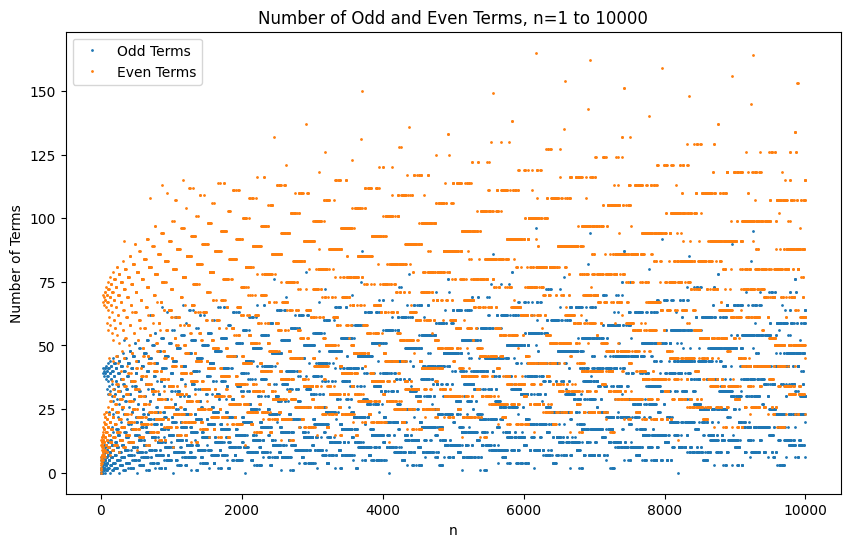

In [91]:
def collatz_odd_count(n):
    odd_count = 0
    while n != 1:
        if n % 2 == 1:
            odd_count += 1
        if n % 2 == 0:
            n = n // 2
        else:
            n = 3 * n + 1
    return odd_count
def collatz_even_count(n):
    even_count = 0
    while n != 1:
        if n % 2 == 0:
            even_count += 1
            n = n // 2
        else:
            n = 3 * n + 1
    return even_count
integers = list(range(1, 10001))
odd_counts = [collatz_odd_count(n) for n in integers]
even_counts = [collatz_even_count(n) for n in integers]
plt.figure(figsize=(10, 6))
plt.plot(integers, odd_counts, marker='o', markersize=1, linestyle='None', label='Odd Terms')
plt.plot(integers, even_counts, marker='o', markersize=1, linestyle='None', label='Even Terms')
plt.xlabel('n')
plt.ylabel('Number of Terms')
plt.title('Number of Odd and Even Terms, n=1 to 10000')
plt.legend()
plt.show()

The length plot shows a chaotic or random behaviour, next we can examine the frequencies of different lengths that appear in those trajectories.

The residue

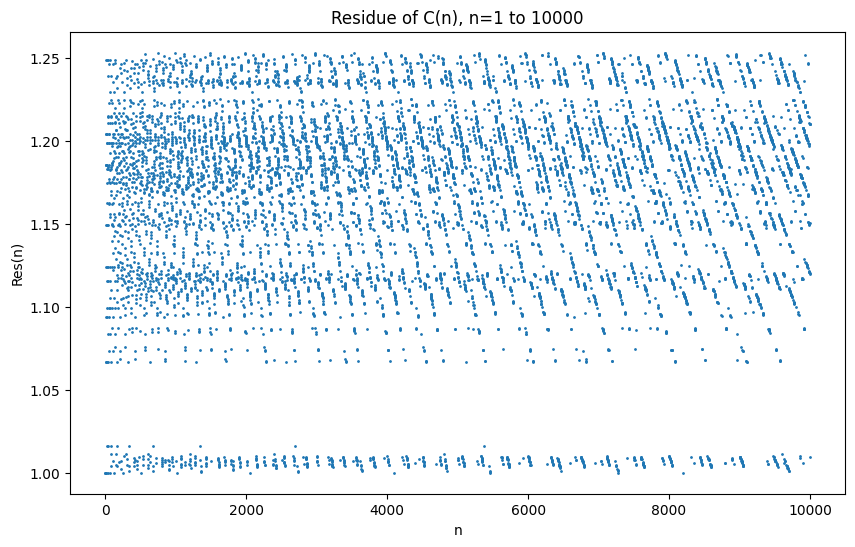

In [99]:
ratios = [(2**even) / (n * (3**odd)) if odd != 0 else 2**even / n for n, even, odd in zip(integers, even_counts, odd_counts)]
plt.figure(figsize=(10, 6))
plt.plot(integers, ratios, marker='o', markersize=1, linestyle='None')
plt.xlabel('n')
plt.ylabel('Res(n)')
plt.title('Residue of C(n), n=1 to 10000')
plt.show()

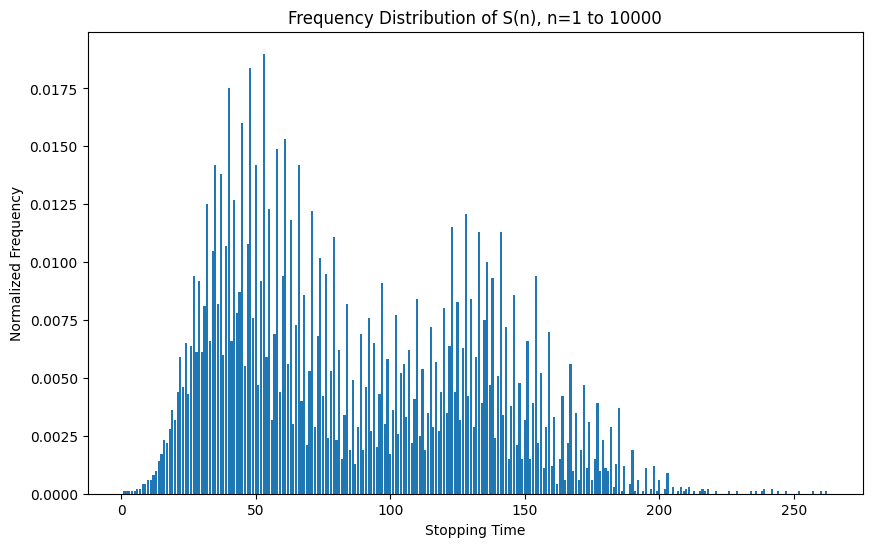

In [76]:
import matplotlib.pyplot as plt
from collections import Counter
def collatz_trajectory_length(n):
    length = 1
    while n != 1:
        if n % 2 == 0:
            n = n // 2
        else:
            n = 3 * n + 1
        length += 1
    return length
integers = list(range(1, 10001))
lengths = [collatz_trajectory_length(n) for n in integers]
length_freq = Counter(lengths)
total_integers = len(integers)
normalized_freq = {length: freq / total_integers for length, freq in length_freq.items()}
plt.figure(figsize=(10, 6))
plt.bar(normalized_freq.keys(), normalized_freq.values())
plt.xlabel('Stopping Time')
plt.ylabel('Normalized Frequency')
plt.title('Frequency Distribution of S(n), n=1 to 10000')
plt.show()

We can further break down the sequence into even and odd parts,

## **Experiments**

1. Primitive Modulo n
2. Riemann Zeta Zeros
3. Integer Partition
